# Data Exploration

## Library and Resource Declaration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.bad_word_blurrer import blur_text
from utils.text_preprocessing import preprocess_text

## First Look to the Dataset 

In [2]:
# Dataset loading
df = pd.read_csv("../dataset/cyberbullying_tweets.csv")

# Some quality controll
print("Row and column number:\n", df.shape)
print("\nNull value in every columns:\n", df.isnull().sum())
print("\nColumn names and types:\n", df.dtypes)

print("\nDataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df["cyberbullying_type"].value_counts())


Row and column number:
 (47692, 2)

Null value in every columns:
 tweet_text            0
cyberbullying_type    0
dtype: int64

Column names and types:
 tweet_text            object
cyberbullying_type    object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None

Class Distribution:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


## Class Distribution Plot

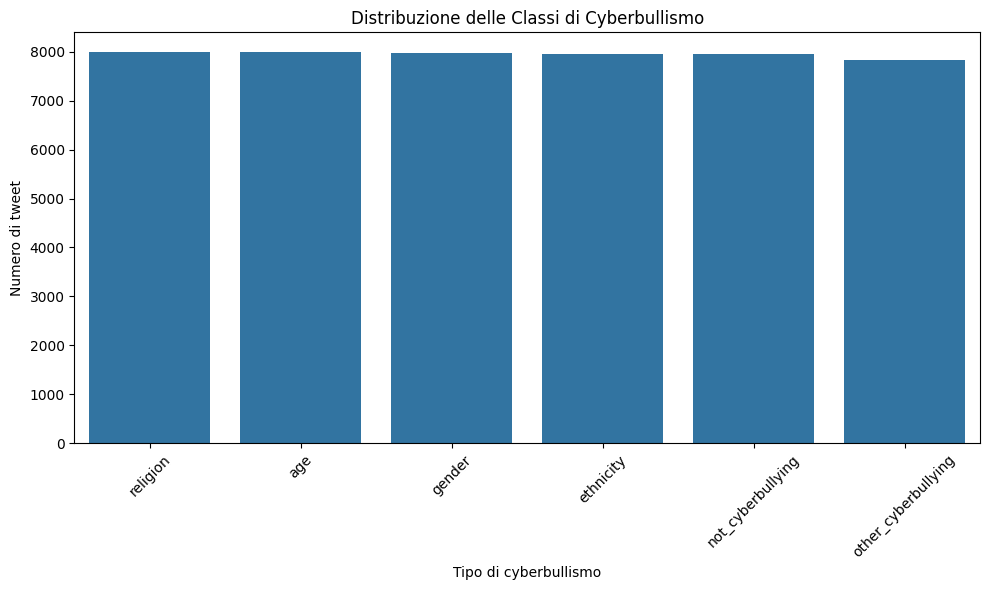

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type', order=df['cyberbullying_type'].value_counts().index)
plt.title('Distribuzione delle Classi di Cyberbullismo')
plt.xlabel('Tipo di cyberbullismo')
plt.ylabel('Numero di tweet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Text Lenght Plot

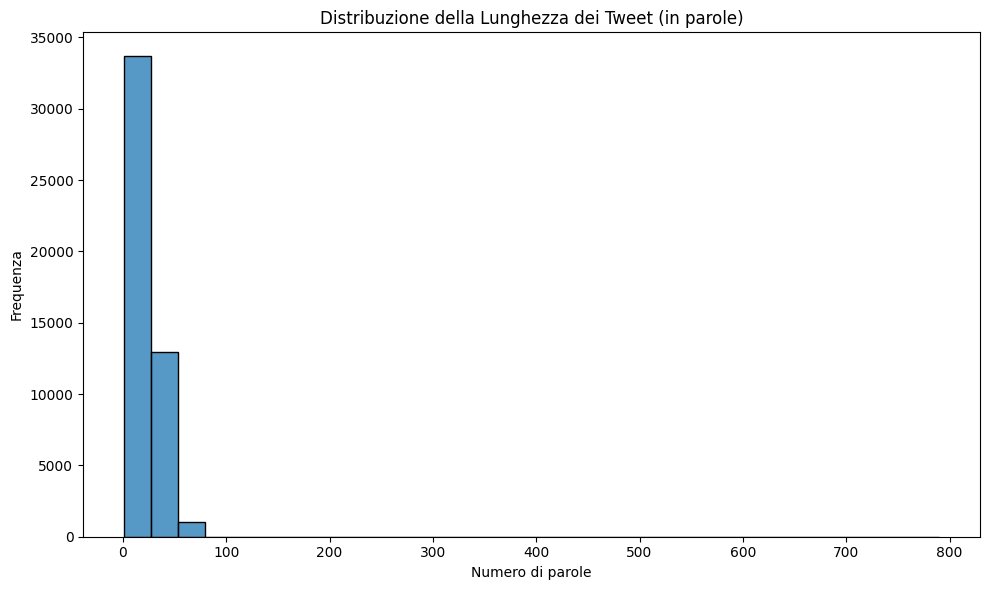

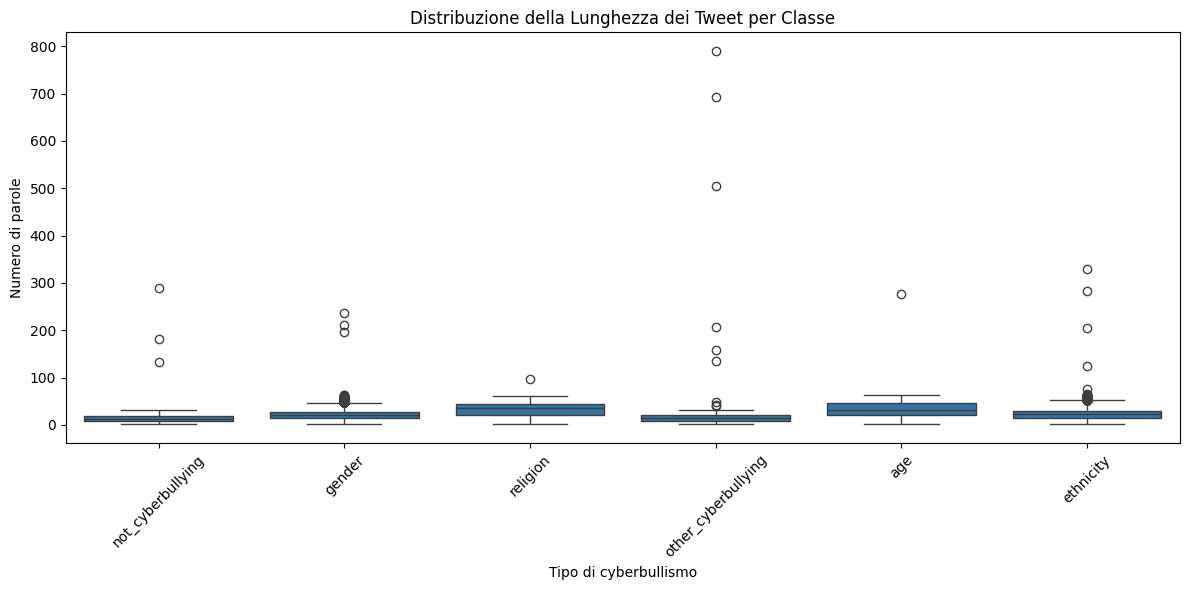

In [4]:
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=False)
plt.title('Distribuzione della Lunghezza dei Tweet (in parole)')
plt.xlabel('Numero di parole')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cyberbullying_type', y='tweet_length')
plt.title('Distribuzione della Lunghezza dei Tweet per Classe')
plt.xlabel('Tipo di cyberbullismo')
plt.ylabel('Numero di parole')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## WordCloud by Labels

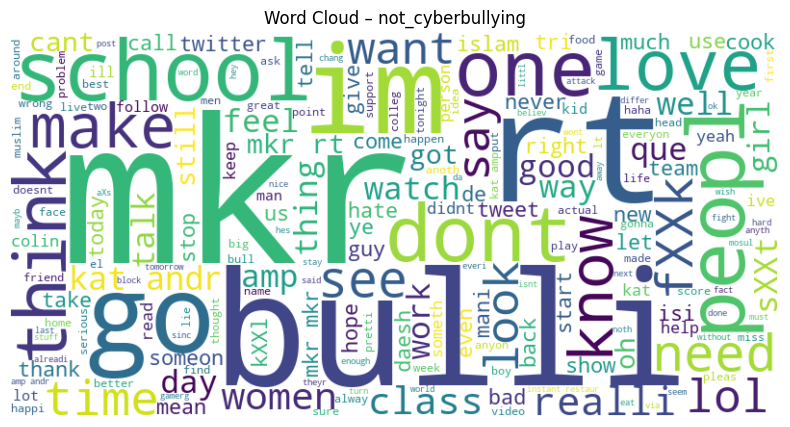

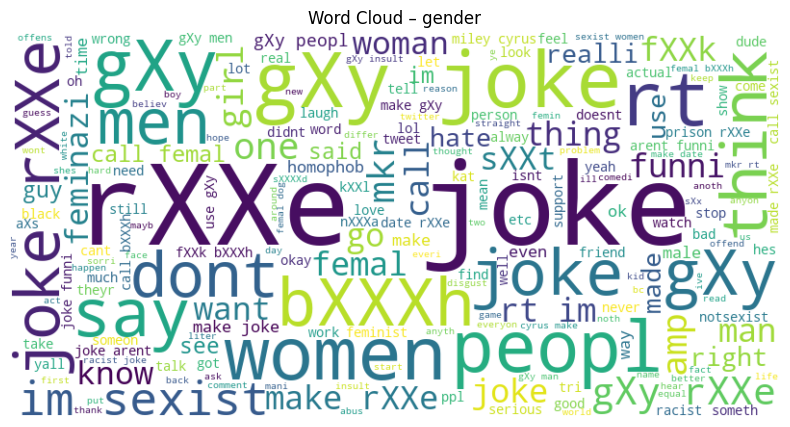

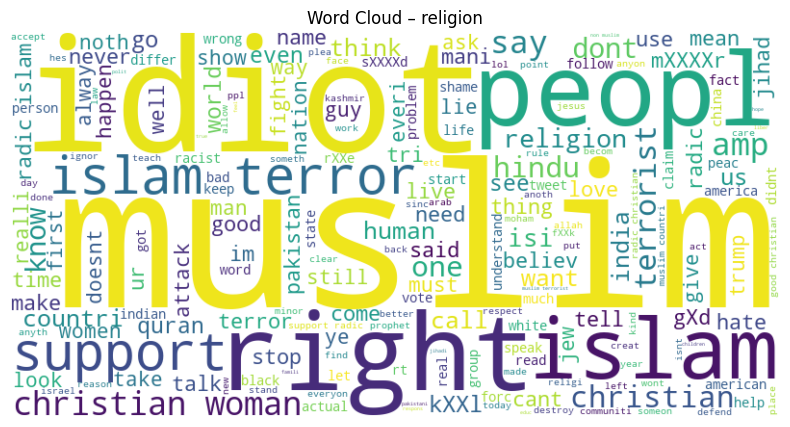

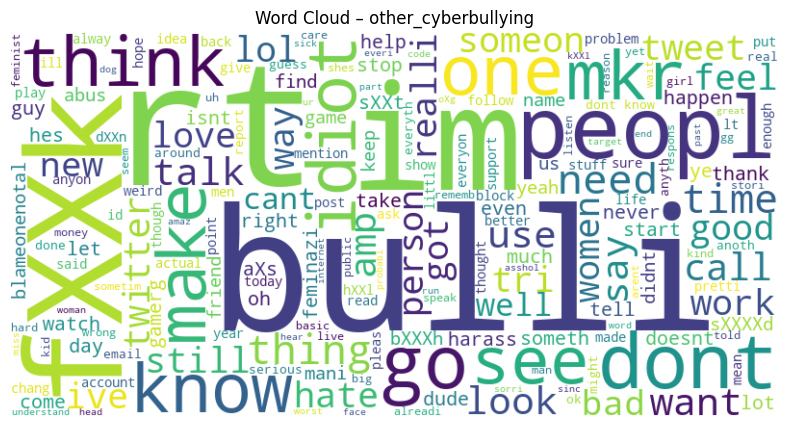

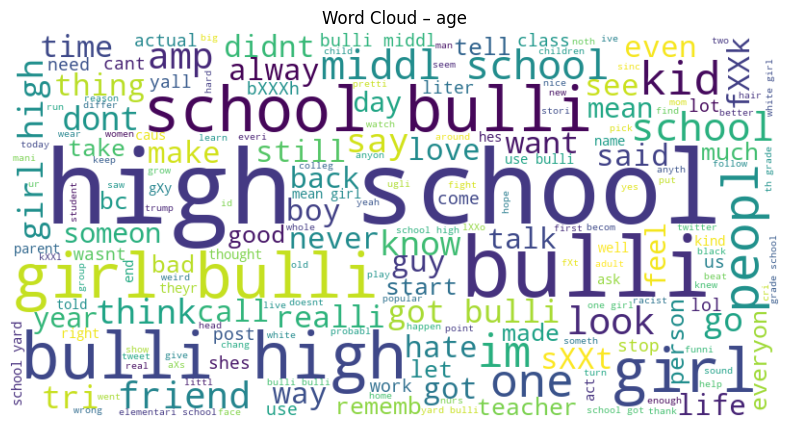

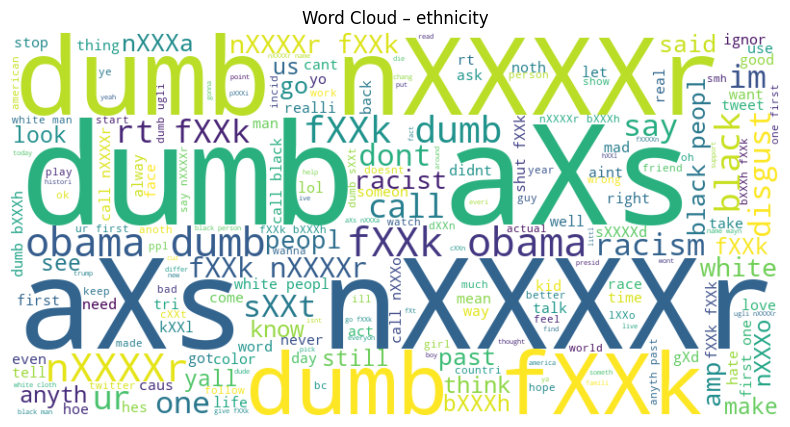

In [5]:
unique_labels = df['cyberbullying_type'].unique()

for label in unique_labels:
    tweets = df[df['cyberbullying_type'] == label]['tweet_text']
    all_words = []

    for tweet in tweets:
        # Disclaimer: the text was cleaned solely for better visualization in the word cloud. This version is not stored or used for analysis.
        clean_tweet = preprocess_text(tweet)
        blurred_tweet = blur_text(clean_tweet)  
        
        tokens = blurred_tweet.split()
        unigrams = [w for w in tokens if '_' not in w and ' ' not in w]
        all_words.extend(unigrams)

    final_text = ' '.join(all_words).replace('*', 'X')

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(final_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud – {label}')
    plt.show()




In [6]:
all_words = []

for tweet in df['tweet_text']:
    clean_tweet = preprocess_text(tweet)
    all_words.extend(clean_tweet.split())

unique_word_count = len(set(all_words))
print(f"Unique word after preprocessing: {unique_word_count}")

Unique word after preprocessing: 36045


## Train Set & Test Set Split

In [7]:
df = pd.read_csv("../dataset/cyberbullying_tweets.csv")
df_export = df.copy()
df_export['binary_label'] = df_export['cyberbullying_type'].apply(
    lambda x: 'cyberbullying' if x != 'not_cyberbullying' else 'not_cyberbullying'
)
df_export = df_export[['tweet_text', 'binary_label', 'cyberbullying_type']].copy()
df_export.columns = ['text', 'binary_label', 'multiclass_label']


train_df, test_df = train_test_split(
    df_export,
    test_size=0.2,
    stratify=df_export['multiclass_label'],
    random_state=42
)

train_df.to_csv('../dataset/training_set.csv', index=False)
test_df.to_csv('../dataset/test_set.csv', index=False)


### Verifing the classes distribution

In [8]:
print("=== TRAINING SET DISTRIBUTION===\n")

print(train_df['multiclass_label'].value_counts())
print(train_df['binary_label'].value_counts())

print("\n\n=== TEST SET DISTRIBUTION ===\n")

print(test_df['multiclass_label'].value_counts())
print(test_df['binary_label'].value_counts())


=== TRAINING SET DISTRIBUTION===

multiclass_label
religion               6398
age                    6394
gender                 6378
ethnicity              6369
not_cyberbullying      6356
other_cyberbullying    6258
Name: count, dtype: int64
binary_label
cyberbullying        31797
not_cyberbullying     6356
Name: count, dtype: int64


=== TEST SET DISTRIBUTION ===

multiclass_label
religion               1600
age                    1598
gender                 1595
ethnicity              1592
not_cyberbullying      1589
other_cyberbullying    1565
Name: count, dtype: int64
binary_label
cyberbullying        7950
not_cyberbullying    1589
Name: count, dtype: int64
